# Encoding Numerical features
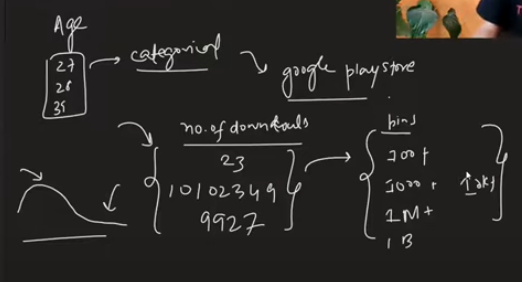

Two technic :
 1. Discretization(Binning)
 2. Binarization

## Discretization(Binning)
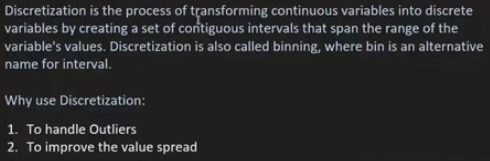
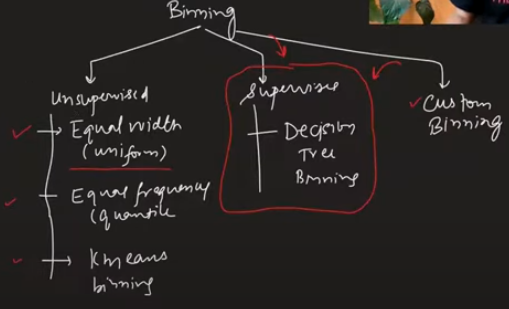

## Unsupervised Binning 


### 1. Equal Width/Uniform Binning
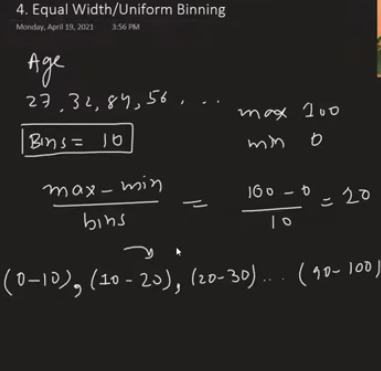

### 2. Equal frequency/Quantie Binning
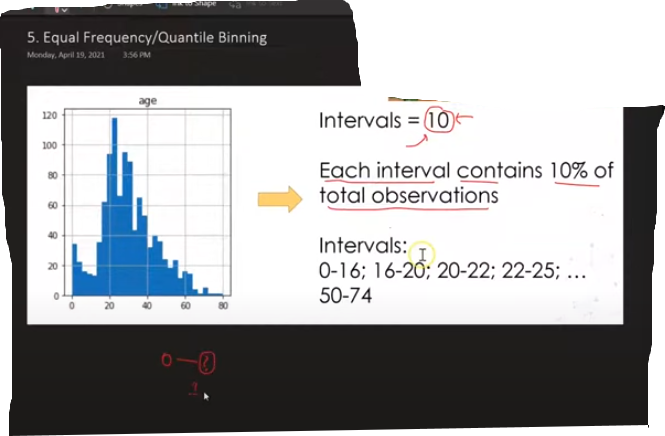

### 3. K-Means Binning
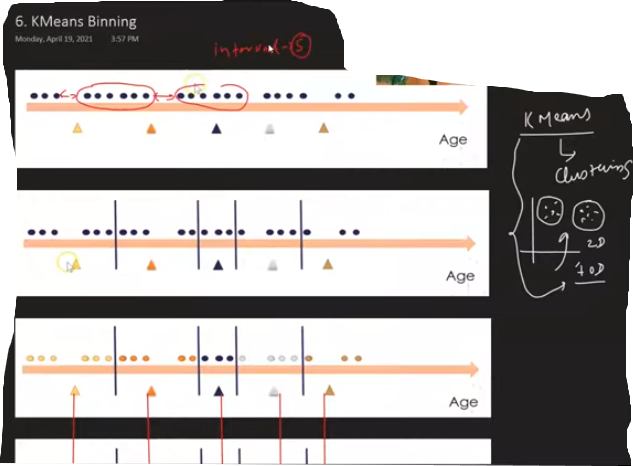

### Custom Binning
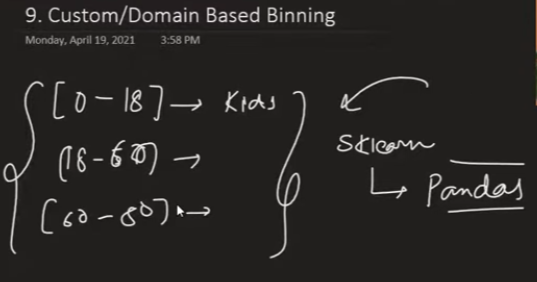

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train_d32.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.shape

(714, 3)

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [14]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [20]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345070422535211

In [21]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [32]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [33]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [34]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [35]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [36]:
output = pd.DataFrame(
    {
        'age':X_train['Age'],
        'age_trf':X_train_trf[:,0],
        'fare':X_train['Fare'],
        'fare_trf':X_train_trf[:,1]
    }
)

In [37]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                             bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [39]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
672,70.0,9.0,10.5000,3.0,"(50.0, 80.0]","(9.225, 13.0]"
499,24.0,3.0,7.7958,1.0,"(22.0, 25.0]","(7.75, 7.896]"
338,45.0,8.0,8.0500,2.0,"(42.0, 50.0]","(7.896, 9.225]"
33,66.0,9.0,10.5000,3.0,"(50.0, 80.0]","(9.225, 13.0]"
523,44.0,8.0,57.9792,8.0,"(42.0, 50.0]","(51.479, 82.171]"


In [41]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [42]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [43]:
X_trf = trf.fit_transform(X)

In [45]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6359154929577465

In [46]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6316705790297339


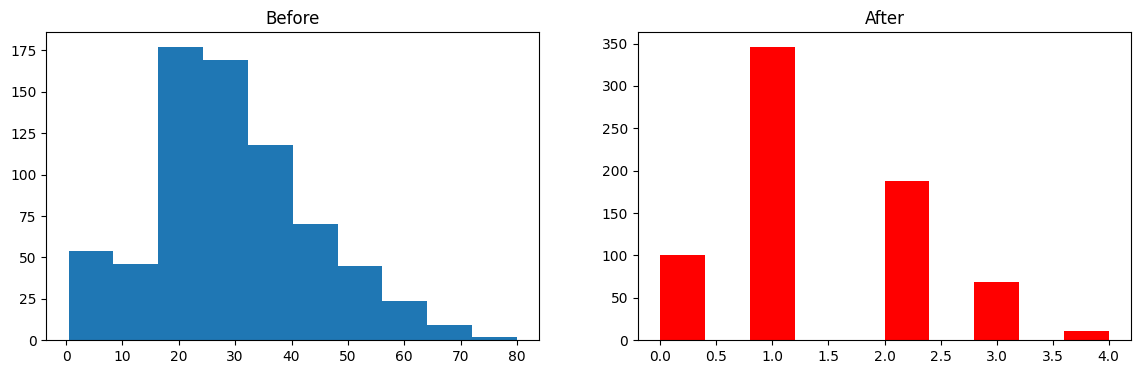

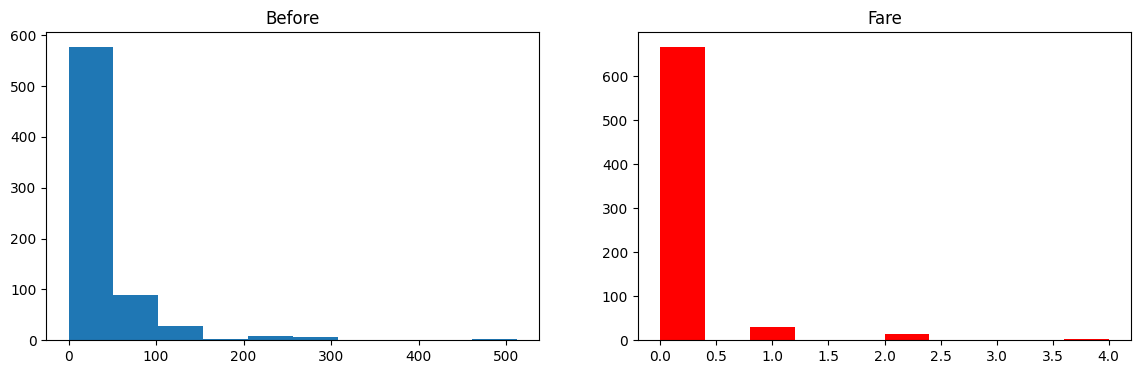

In [48]:
discretize(5,'uniform')

## Binarization
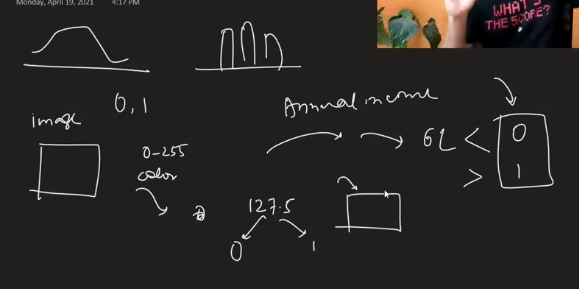

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train_d32.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [3]:
df.dropna(inplace=True)

In [4]:
df.head(10)

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0
6,54.0,51.8625,0,0,0
7,2.0,21.0750,3,1,0
8,27.0,11.1333,0,2,1
9,14.0,30.0708,1,0,1
10,4.0,16.7000,1,1,1


In [5]:
df['Family'] = df['SibSp'] + df['Parch']

In [6]:
df.head(5)

,Age,Fare,SibSp,Parch,Survived,Family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [7]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [8]:
df.head(5)

,Age,Fare,Survived,Family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.head(5)

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [12]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6471439749608764

In [14]:
# Applying Binarization
from sklearn.preprocessing import Binarizer

In [15]:
trf = ColumnTransformer(
    [
        ('bin',Binarizer(copy=False),['Family'])
    ],remainder='passthrough'
)

In [16]:

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [17]:

pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)


0.6153846153846154

In [19]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6318075117370892